In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

madoff_df = pd.read_csv('MADOFF.csv', index_col=0)

# Replace NaN values with 0
madoff_df = madoff_df.fillna(0)

G = nx.from_pandas_adjacency(madoff_df)

print("Nombre de noeuds :", G.number_of_nodes())
print("Nombre d'arêtes :", G.number_of_edges())

Nombre de noeuds : 61
Nombre d'arêtes : 61


In [ ]:
print("Densité :", nx.density(G))

Densité : 0.03333333333333333


In [ ]:
print("Liste des noeuds :", list(G.nodes)[:10])
print("Liste des arêtes :", list(G.edges)[:10])

Liste des noeuds : ['HSBC_Holdings', 'Genevalor_Benbassat', 'Phoenix_Holdings', 'Thema_Fund', 'Herald_Lux_Fund', 'Capital_Bank_Austria', 'Cohmad_securities', 'Bank_Medici', 'UniCredit_SpA', 'Pioneer_Alt_Investments']
Liste des arêtes : [('HSBC_Holdings', 'Herald_Lux_Fund'), ('Genevalor_Benbassat', 'Thema_Fund'), ('Phoenix_Holdings', 'Thema_Fund'), ('Thema_Fund', 'Bank_Medici'), ('Herald_Lux_Fund', 'Bank_Medici'), ('Capital_Bank_Austria', 'Bank_Medici'), ('Cohmad_securities', 'Bank_Medici'), ('Cohmad_securities', 'Bernard_Madoff_Investment'), ('Bank_Medici', 'Bank_Medici'), ('Bank_Medici', 'Pioneer_Alt_Investments')]


In [ ]:
degree_sequence = [d for n, d in G.degree()]

(array([ 0., 44.,  9.,  2.,  2.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27.]),
 <BarContainer object of 27 artists>)

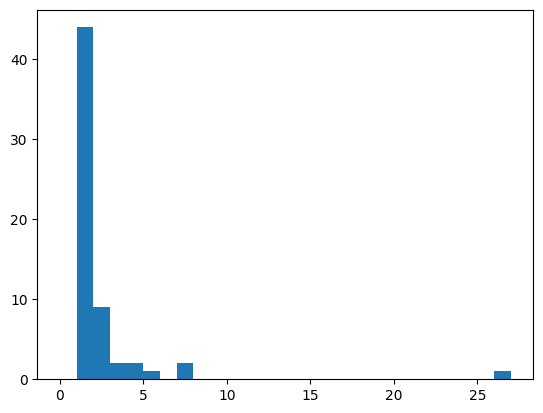

In [ ]:
plt.hist(degree_sequence, bins=range(max(degree_sequence)+1))

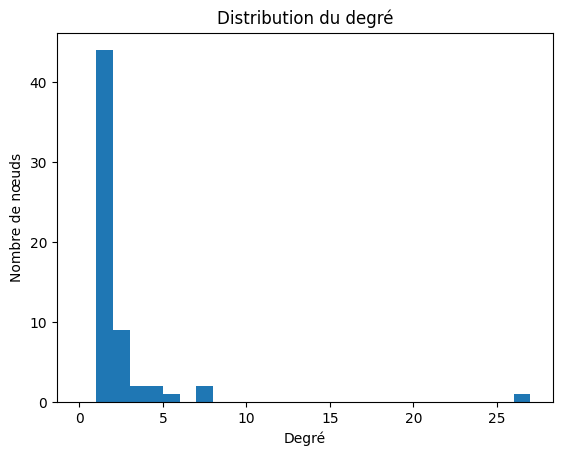

In [ ]:
plt.hist(degree_sequence, bins=range(max(degree_sequence)+1))
plt.title("Distribution du degré")
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.show()

In [ ]:
avg_degree = sum(degree_sequence) / G.number_of_nodes()
print("Degré moyen :", avg_degree)

Degré moyen : 2.0


In [ ]:
assortativity = nx.degree_assortativity_coefficient(G)
print("Assortativité par degré :", assortativity)


Assortativité par degré : -0.3772451095955949


In [ ]:
deg_centrality = nx.degree_centrality(G)

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
sorted_degree = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)

In [ ]:
print("Top 5 hubs (centralité de degré) :", sorted_degree[:5])

Top 5 hubs (centralité de degré) : [('Bernard_Madoff_Investment', 0.45), ('Bank_Medici', 0.11666666666666667), ('Fairfield_Greenwich', 0.11666666666666667), ('Gabriel_Capital', 0.08333333333333333), ('Tremont_Group_Holdings', 0.06666666666666667)]


In [ ]:
sizes = [5000 * deg_centrality[n] for n in G.nodes()]

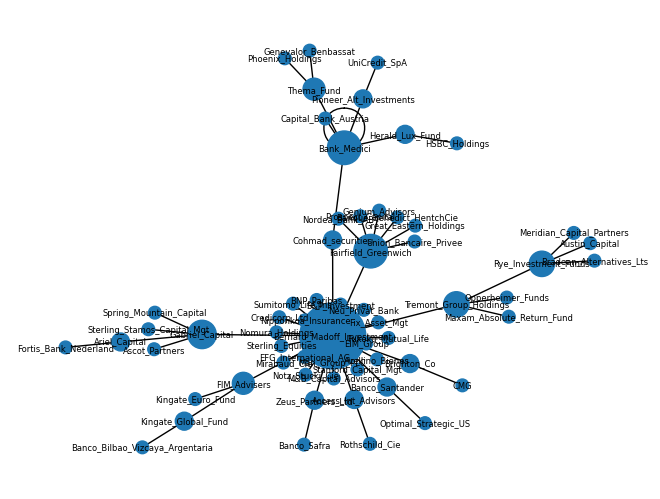

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=sizes, font_size=6)
plt.show()

In [ ]:
print("Le réseau est-il connecté :", nx.is_connected(G))

Le réseau est-il connecté : True


In [ ]:
print("Nombre de composantes connectées :", nx.number_connected_components(G))

Nombre de composantes connectées : 1


In [ ]:
largest_cc = max(nx.connected_components(G), key=len)

In [ ]:
print("Taille de la plus grande composante :", len(largest_cc))

Taille de la plus grande composante : 61


In [ ]:
G_giant = G.subgraph(largest_cc)

In [ ]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

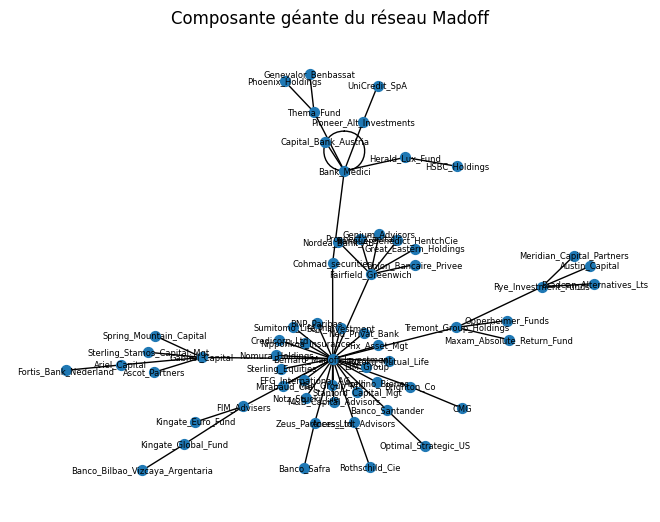

In [ ]:
nx.draw(G_giant, pos, with_labels=True, node_size=50, font_size=6)
plt.title('Composante géante du réseau Madoff')
plt.show()

Text(0.5, 1.0, 'Composante géante du réseau Madoff')

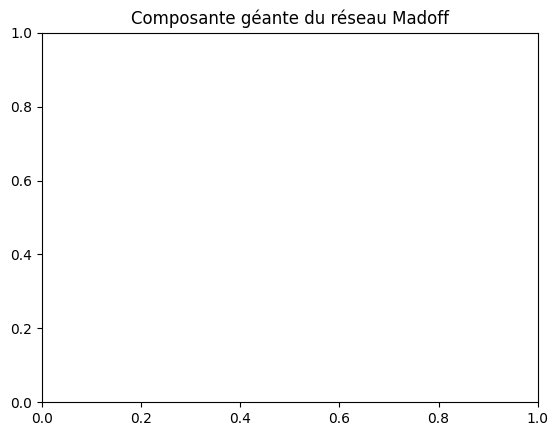

In [ ]:
print("Longueur moyenne des chemins (APL) :", nx.average_shortest_path_length(G_giant))

Longueur moyenne des chemins (APL) : 3.430601092896175


In [ ]:
print("Diamètre :", nx.diameter(G_giant))

Diamètre : 7


In [ ]:
print("Coefficient de clustering moyen :", nx.average_clustering(G))

Coefficient de clustering moyen : 0.0


In [ ]:
triangles = sum(nx.triangles(G).values()) // 3

In [ ]:
print("Nombre de triangles dans le réseau :", triangles)

Nombre de triangles dans le réseau : 0


In [ ]:
import networkx.algorithms.community as nxcom

In [ ]:
communities = nxcom.greedy_modularity_communities(G)

In [ ]:
print("Nombre de communautés trouvées :", len(communities))

Nombre de communautés trouvées : 10


In [ ]:
color_map = {}
for c_idx, community in enumerate(communities):
    for name in community:
        color_map[name] = c_idx

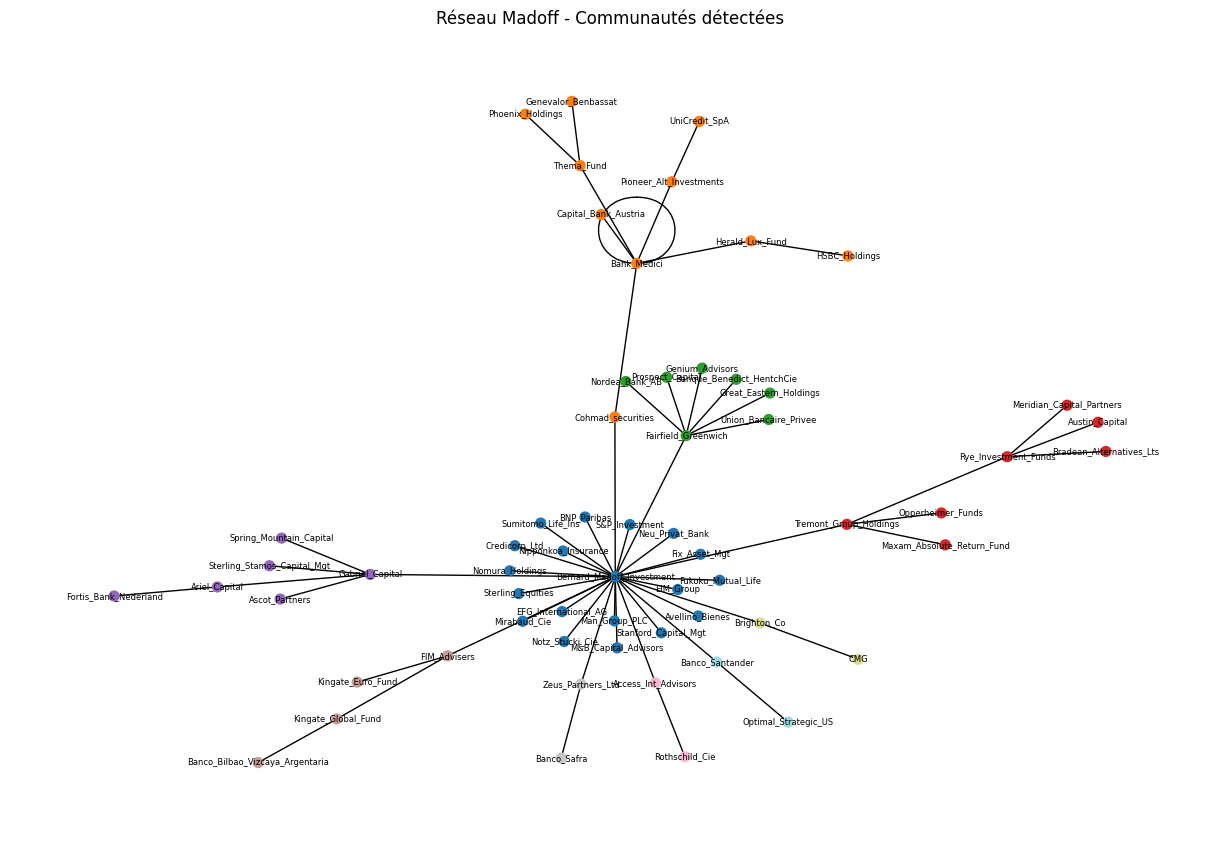

In [ ]:
colors = [color_map[n] for n in G.nodes()]
plt.figure(figsize=(12,8))
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.tab20, node_size=50, font_size=6)
plt.title('Réseau Madoff - Communautés détectées')
plt.show()

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))

core_numbers = nx.core_number(G)
print("Core number max :", max(core_numbers.values()))

NameError: name 'G' is not defined

In [ ]:
clustering = nx.clustering(G)
sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)
print("Top 5 noeuds avec le plus fort clustering :", sorted_clustering[:5])


Top 5 noeuds avec le plus fort clustering : [('HSBC_Holdings', 0), ('Genevalor_Benbassat', 0), ('Phoenix_Holdings', 0), ('Thema_Fund', 0), ('Herald_Lux_Fund', 0)]


In [ ]:
edge_betweenness = nx.edge_betweenness_centrality(G)
sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
print("Top 5 liens avec la plus forte intermédiarité :", sorted_edges[:5])


Top 5 liens avec la plus forte intermédiarité : [(('Cohmad_securities', 'Bernard_Madoff_Investment'), 0.2786885245901639), (('Cohmad_securities', 'Bank_Medici'), 0.25573770491803277), (('Fairfield_Greenwich', 'Bernard_Madoff_Investment'), 0.20655737704918034), (('Tremont_Group_Holdings', 'Bernard_Madoff_Investment'), 0.20655737704918034), (('Gabriel_Capital', 'Bernard_Madoff_Investment'), 0.18032786885245902)]


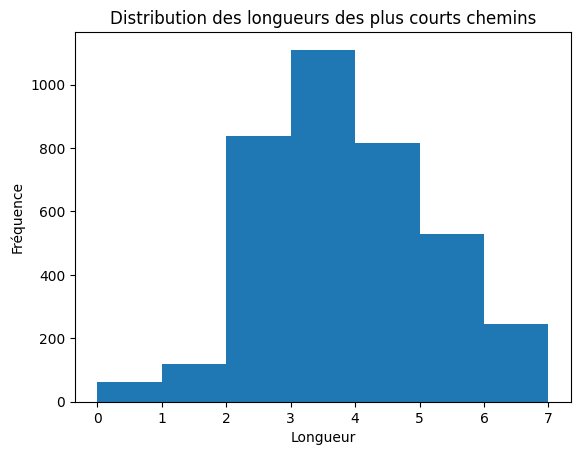

In [ ]:
path_lengths = dict(nx.all_pairs_shortest_path_length(G_giant))
all_lengths = [length for target_dict in path_lengths.values() for length in target_dict.values()]
plt.hist(all_lengths, bins=range(max(all_lengths)+1))
plt.title("Distribution des longueurs des plus courts chemins")
plt.xlabel("Longueur")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
from copy import deepcopy

def robustness_test(G, removal_fraction=0.1):
    G_copy = deepcopy(G)
    num_remove = int(removal_fraction * G_copy.number_of_nodes())
    nodes_sorted = sorted(G_copy.degree, key=lambda x: x[1], reverse=True)
    to_remove = [n for n, d in nodes_sorted[:num_remove]]
    G_copy.remove_nodes_from(to_remove)
    largest_cc = max(nx.connected_components(G_copy), key=len)
    return len(largest_cc) / G.number_of_nodes()

print("Taille relative après suppression de 10% des hubs :", robustness_test(G, 0.1))


Taille relative après suppression de 10% des hubs : 0.06557377049180328


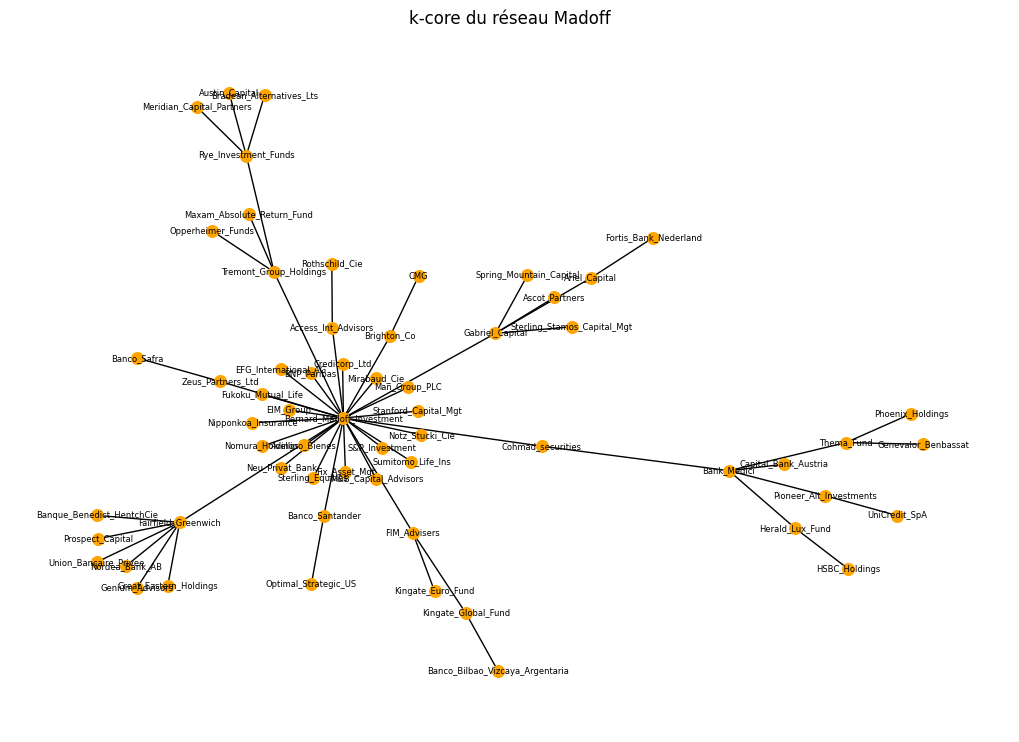

In [ ]:
k_core = nx.k_core(G)
plt.figure(figsize=(10,7))
nx.draw(k_core, with_labels=True, node_size=70, font_size=6, node_color='orange')
plt.title('k-core du réseau Madoff')
plt.show()


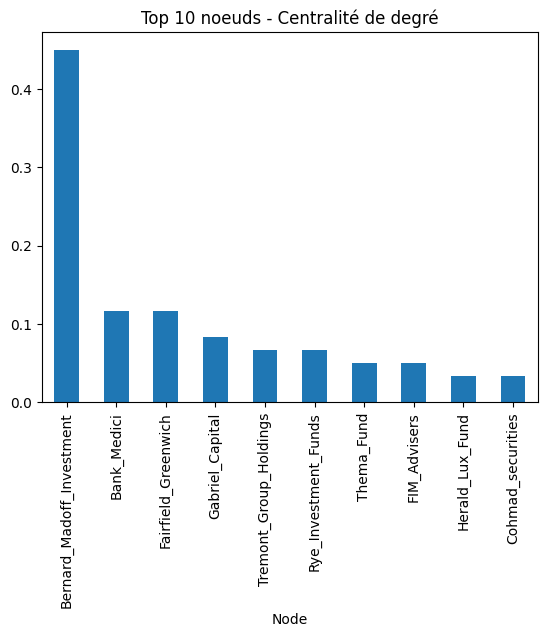

In [ ]:
import pandas as pd

deg_df = pd.DataFrame(sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True), columns=['Node', 'Degree Centrality'])
deg_df[:10].plot(x='Node', y='Degree Centrality', kind='bar', legend=False)
plt.title("Top 10 noeuds - Centralité de degré")
plt.show()


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

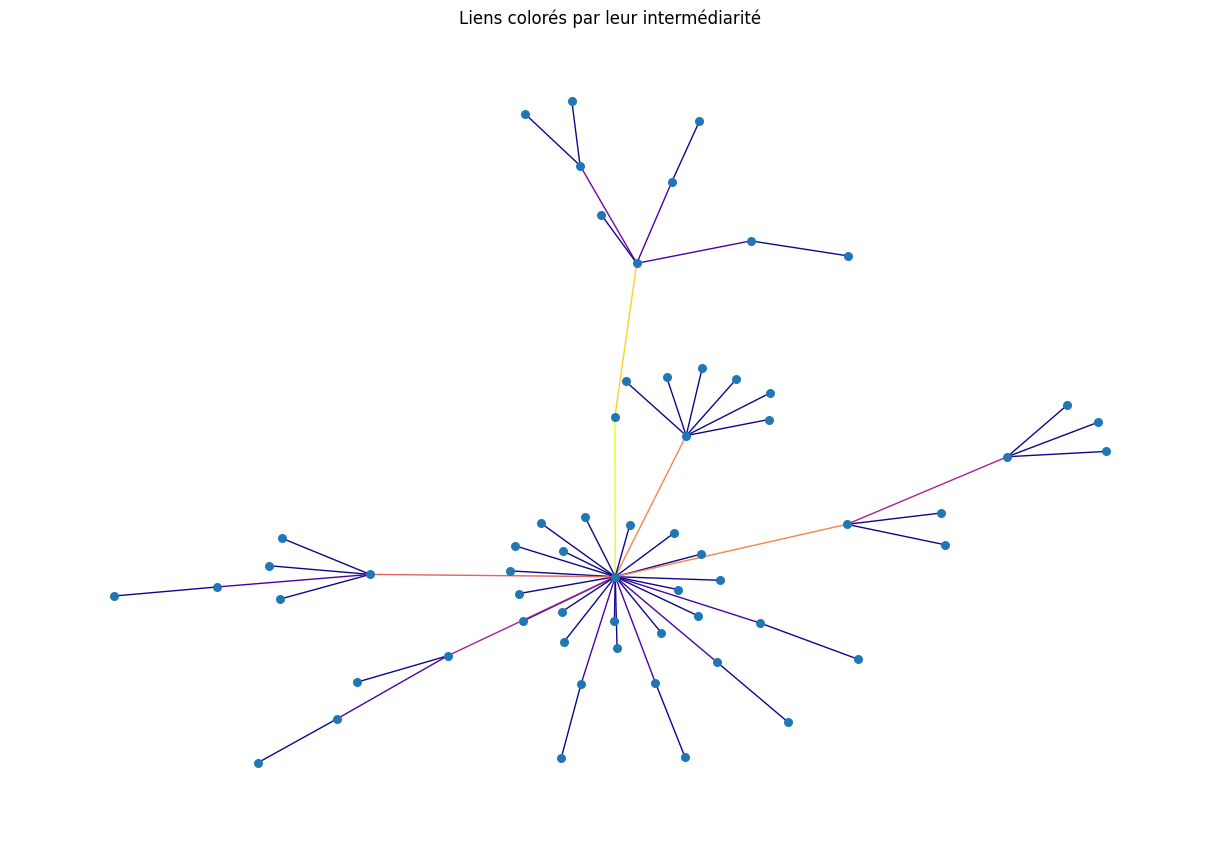

In [ ]:
edge_color = [edge_betweenness.get(edge, 0) for edge in G.edges()]
plt.figure(figsize=(12,8))
nx.draw(G, pos, edge_color=edge_color, edge_cmap=plt.cm.plasma, with_labels=False, node_size=30)
plt.title('Liens colorés par leur intermédiarité')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma))
plt.show()


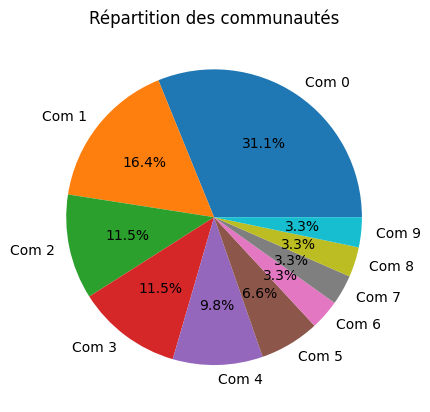

In [ ]:
community_sizes = [len(c) for c in communities]
plt.pie(community_sizes, labels=[f"Com {i}" for i in range(len(community_sizes))], autopct='%1.1f%%')
plt.title("Répartition des communautés")
plt.show()


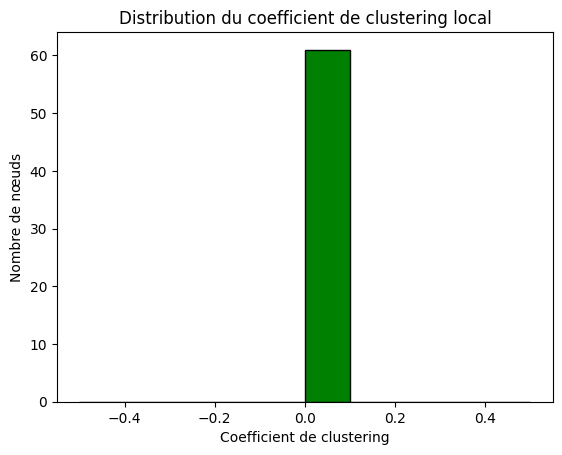

In [ ]:
clustering_values = list(clustering.values())
plt.hist(clustering_values, bins=10, color='green', edgecolor='black')
plt.title('Distribution du coefficient de clustering local')
plt.xlabel('Coefficient de clustering')
plt.ylabel('Nombre de nœuds')
plt.show()


In [ ]:
A = nx.adjacency_matrix(G)
print("Matrice d'adjacence :")
print(A.todense())

strength = dict(G.degree(weight='weight'))
print("Force des nœuds :", strength)

A = nx.adjacency_matrix(G)
print("Matrice d'adjacence :")
print(A.todense())

strength = dict(G.degree(weight='weight'))
print("Force des nœuds :", strength)

knn = {node: sum(G.degree(neighbor) for neighbor in G.neighbors(node)) / G.degree(node) if G.degree(node) > 0 else 0 for node in G}
print("Degré moyen des voisins :", knn)

Matrice d'adjacence :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Force des nœuds : {'HSBC_Holdings': 1.0, 'Genevalor_Benbassat': 1.0, 'Phoenix_Holdings': 1.0, 'Thema_Fund': 3.0, 'Herald_Lux_Fund': 2.0, 'Capital_Bank_Austria': 1.0, 'Cohmad_securities': 2.0, 'Bank_Medici': 5.0, 'UniCredit_SpA': 1.0, 'Pioneer_Alt_Investments': 2.0, 'Rothschild_Cie': 1.0, 'Access_Int_Advisors': 2.0, 'BNP_Paribas': 1.0, 'EIM_Group': 1.0, 'Nipponkoa_Insurance': 1.0, 'Mirabaud_Cie': 1.0, 'Zeus_Partners_Ltd': 2.0, 'Banco_Safra': 1.0, 'CMG': 1.0, 'Brighton_Co': 2.0, 'Avellino_Bienes': 1.0, 'Neu_Privat_Bank': 1.0, 'Banco_Santander': 2.0, 'Optimal_Strategic_US': 1.0, 'Sumitomo_Life_Ins': 1.0, 'Fukoku_Mutual_Life': 1.0, 'Fix_Asset_Mgt': 1.0, 'Fairfield_Greenwich': 7.0, 'Nordea_Bank_AB': 1.0, 'Banque_Benedict_HentchCie': 1.0, 'Genium_Advisors': 1.0, 'Great_Eastern_Holdings': 1.0, 'Prospect_Capital': 1.0,